<a href="https://colab.research.google.com/github/LOGITHNATHAN/Employee-Attrition-Analysis-and-Prediction/blob/main/attrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.option_context('mode.use_inf_as_na', True)
pd.set_option('display.max_columns', None)
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("/content/Employee-Attrition - Employee-Attrition.csvv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,category_Human Resources,category_Life Sciences,category_Marketing,category_Medical,category_Other,category_Technical Degree,category_Healthcare Representative,category_Human Resources.1,category_Laboratory Technician,category_Manager,category_Manufacturing Director,category_Research Director,category_Research Scientist,category_Sales Executive,category_Sales Representative
0,41,1,0,1102,0,1,2,1,1,2,0,94,3,2,4,0,5993,19479,8,1,1,11,3,1,80,0,8,0,1,6,4,0,5,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,49,0,1,279,1,8,1,1,2,3,1,61,2,2,2,1,5130,24907,1,1,0,23,4,4,80,1,10,3,3,10,7,1,7,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,37,1,0,1373,1,2,2,1,4,4,1,92,2,1,3,0,2090,2396,6,1,1,15,3,2,80,0,7,3,3,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
3,33,0,1,1392,1,3,4,1,5,4,0,56,3,1,3,1,2909,23159,1,1,1,11,3,3,80,0,8,3,3,8,7,3,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,27,0,0,591,1,2,1,1,7,1,1,40,3,1,2,1,3468,16632,9,1,0,12,3,4,80,1,6,3,3,2,2,2,2,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0


In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
print(f"There is {df.shape[0]} rows and {df.shape[1]} columns")

There is 1470 rows and 48 columns


In [5]:
df.sample(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,category_Human Resources,category_Life Sciences,category_Marketing,category_Medical,category_Other,category_Technical Degree,category_Healthcare Representative,category_Human Resources.1,category_Laboratory Technician,category_Manager,category_Manufacturing Director,category_Research Director,category_Research Scientist,category_Sales Executive,category_Sales Representative
276,35,0,0,1315,1,22,3,1,381,2,0,71,4,3,2,2,11996,19100,7,1,0,18,3,2,80,1,10,6,2,7,7,6,2,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
614,26,1,1,887,1,5,2,1,848,3,0,88,2,1,3,1,2366,20898,1,1,1,14,3,1,80,1,8,2,3,8,7,1,7,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
186,40,0,0,989,1,4,1,1,253,4,0,46,3,5,3,1,19033,6499,1,1,0,14,3,2,80,1,21,2,3,20,8,9,9,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
605,38,0,1,471,1,12,3,1,837,1,1,45,2,2,1,2,6288,4284,2,1,0,15,3,3,80,1,13,3,2,4,3,1,2,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
819,28,0,0,1451,1,2,1,1,1136,1,1,67,2,1,2,1,3201,19911,0,1,0,17,3,1,80,0,6,2,1,5,3,0,4,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [8]:
df.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,category_Human Resources,category_Life Sciences,category_Marketing,category_Medical,category_Other,category_Technical Degree,category_Healthcare Representative,category_Human Resources.1,category_Laboratory Technician,category_Manager,category_Manufacturing Director,category_Research Director,category_Research Scientist,category_Sales Executive,category_Sales Representative
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,0.392517,802.485714,0.739456,9.192517,2.912925,1.0,1024.865306,2.721769,0.600000,65.891156,2.729932,2.063946,2.728571,0.902721,6502.931293,14313.103401,2.693197,1.0,0.282993,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129,0.018367,0.412245,0.108163,0.315646,0.055782,0.089796,0.089116,0.035374,0.176190,0.069388,0.098639,0.054422,0.198639,0.221769,0.056463
std,9.135373,0.367863,0.665455,403.509100,0.527792,8.106864,1.024165,0.0,602.024335,1.093082,0.490065,20.329428,0.711561,1.106940,1.102846,0.730121,4707.956783,7117.786044,2.498009,0.0,0.450606,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136,0.134321,0.492406,0.310692,0.464931,0.229579,0.285986,0.285008,0.184786,0.381112,0.254199,0.298279,0.226925,0.399112,0.415578,0.230891
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,1.000000,1.0,1.000000,1.000000,0.000000,30.000000,1.000000,1.000000,1.000000,0.000000,1009.000000,2094.000000,0.000000,1.0,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,0.000000,465.000000,0.000000,2.000000,2.000000,1.0,491.250000,2.000000,0.000000,48.000000,2.000000,1.000000,2.000000,0.000000,2911.000000,8047.000000,1.000000,1.0,0.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,36.000000,0.000000,0.000000,802.000000,1.000000,7.000000,3.000000,1.0,1020.500000,3.000000,1.000000,66.000000,3.000000,2.000000,3.000000,1.000000,4919.000000,14235.500000,2.000000,1.0,0.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,43.000000,0.000000,1.000000,1157.000000,1.000000,14.000000,4.000000,1.0,1555.750000,4.000000,1.000000,83.750000,3.000000,3.000000,4.000000,1.000000,8379.000000,20461.500000,4.000000,1.0,1.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 48 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Age                                 1470 non-null   int64
 1   Attrition                           1470 non-null   int64
 2   BusinessTravel                      1470 non-null   int64
 3   DailyRate                           1470 non-null   int64
 4   Department                          1470 non-null   int64
 5   DistanceFromHome                    1470 non-null   int64
 6   Education                           1470 non-null   int64
 7   EmployeeCount                       1470 non-null   int64
 8   EmployeeNumber                      1470 non-null   int64
 9   EnvironmentSatisfaction             1470 non-null   int64
 10  Gender                              1470 non-null   int64
 11  HourlyRate                          1470 non-null   int64
 12  JobInv

In [9]:
df['Attrition'].describe()

,Attrition
count,1470.000000
mean,0.161224
std,0.367863
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [10]:
print(df.corr()['Attrition'].abs().sort_values(ascending=False))

Attrition                             1.000000
OverTime                              0.246118
TotalWorkingYears                     0.171063
JobLevel                              0.169105
MaritalStatus                         0.162070
YearsInCurrentRole                    0.160545
MonthlyIncome                         0.159840
Age                                   0.159205
category_Sales Representative         0.157234
YearsWithCurrManager                  0.156199
StockOptionLevel                      0.137145
YearsAtCompany                        0.134392
JobInvolvement                        0.130016
JobSatisfaction                       0.103481
EnvironmentSatisfaction               0.103369
category_Laboratory Technician        0.098290
category_Research Director            0.088870
category_Manager                      0.083316
category_Manufacturing Director       0.082994
category_Healthcare Representative    0.078696
DistanceFromHome                      0.077924
category_Tech

***Exploratory Data Analysis (EDA)***

In [11]:
df['Attrition'].values

array([1, 0, 1, ..., 0, 0, 0])

Attrition
0    1233
1     237
Name: count, dtype: int64


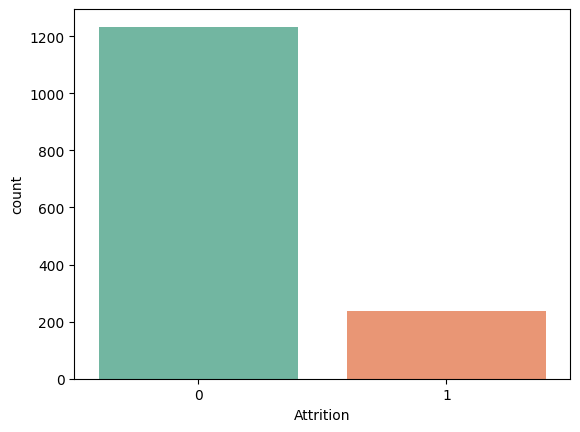

In [12]:
y = df['Attrition']

sns.countplot(x=y, palette='Set2')

target_temp = df['Attrition'].value_counts()
print(target_temp)

In [13]:
print(f"Percentage of Employees who's still working: {str(round(target_temp[0]*100/1470, 2))}")
print(f"Percentage of Employees who's left company: {str(round(target_temp[1]*100/1470, 2))}")

Percentage of Employees who's still working: 83.88
Percentage of Employees who's left company: 16.12


In [14]:
x = df.columns
for i in x:
    print(i)

Age
Attrition
BusinessTravel
DailyRate
Department
DistanceFromHome
Education
EmployeeCount
EmployeeNumber
EnvironmentSatisfaction
Gender
HourlyRate
JobInvolvement
JobLevel
JobSatisfaction
MaritalStatus
MonthlyIncome
MonthlyRate
NumCompaniesWorked
Over18
OverTime
PercentSalaryHike
PerformanceRating
RelationshipSatisfaction
StandardHours
StockOptionLevel
TotalWorkingYears
TrainingTimesLastYear
WorkLifeBalance
YearsAtCompany
YearsInCurrentRole
YearsSinceLastPromotion
YearsWithCurrManager
category_Human Resources
category_Life Sciences
category_Marketing
category_Medical
category_Other
category_Technical Degree
category_Healthcare Representative
category_Human Resources.1
category_Laboratory Technician
category_Manager
category_Manufacturing Director
category_Research Director
category_Research Scientist
category_Sales Executive
category_Sales Representative


In [15]:
x = df.columns
for i in x:
    print(i)

Age
Attrition
BusinessTravel
DailyRate
Department
DistanceFromHome
Education
EmployeeCount
EmployeeNumber
EnvironmentSatisfaction
Gender
HourlyRate
JobInvolvement
JobLevel
JobSatisfaction
MaritalStatus
MonthlyIncome
MonthlyRate
NumCompaniesWorked
Over18
OverTime
PercentSalaryHike
PerformanceRating
RelationshipSatisfaction
StandardHours
StockOptionLevel
TotalWorkingYears
TrainingTimesLastYear
WorkLifeBalance
YearsAtCompany
YearsInCurrentRole
YearsSinceLastPromotion
YearsWithCurrManager
category_Human Resources
category_Life Sciences
category_Marketing
category_Medical
category_Other
category_Technical Degree
category_Healthcare Representative
category_Human Resources.1
category_Laboratory Technician
category_Manager
category_Manufacturing Director
category_Research Director
category_Research Scientist
category_Sales Executive
category_Sales Representative


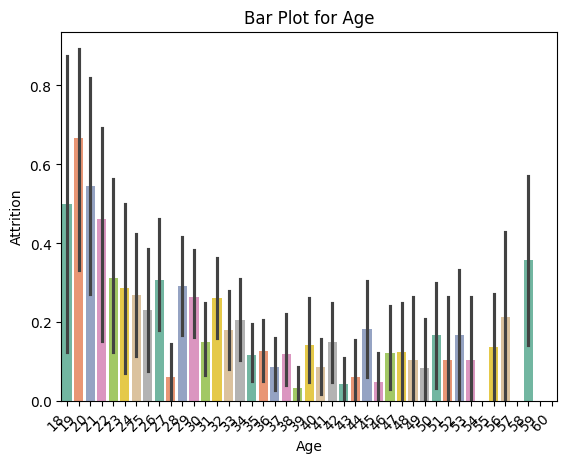

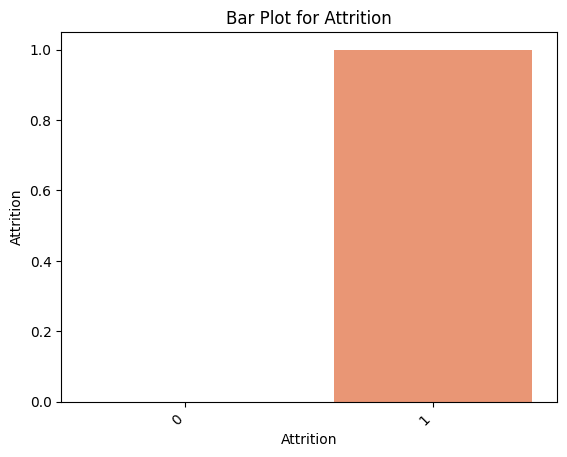

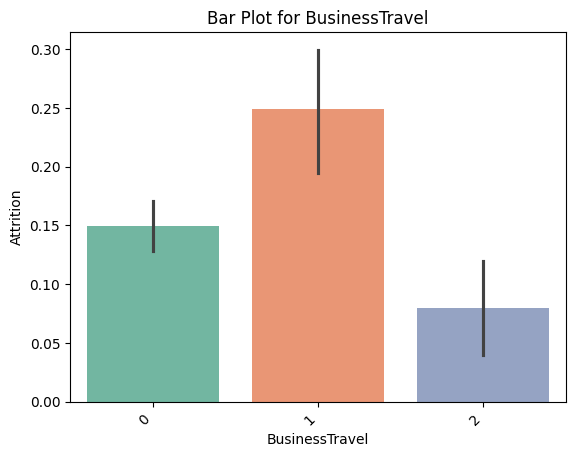

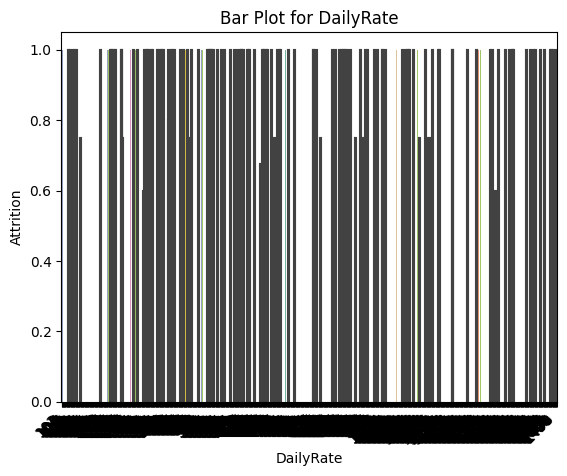

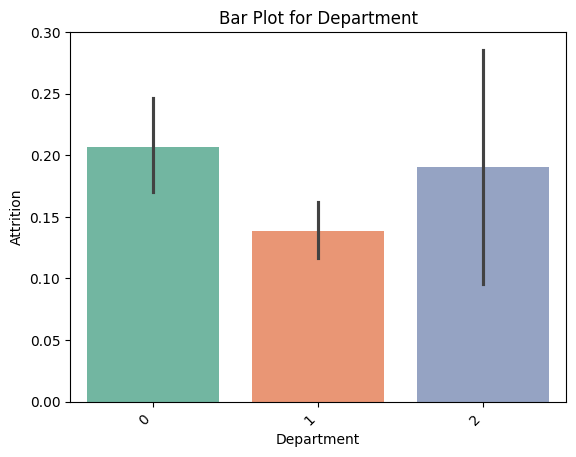

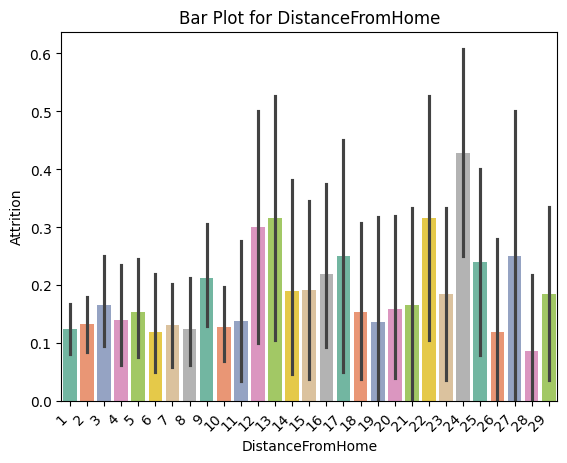

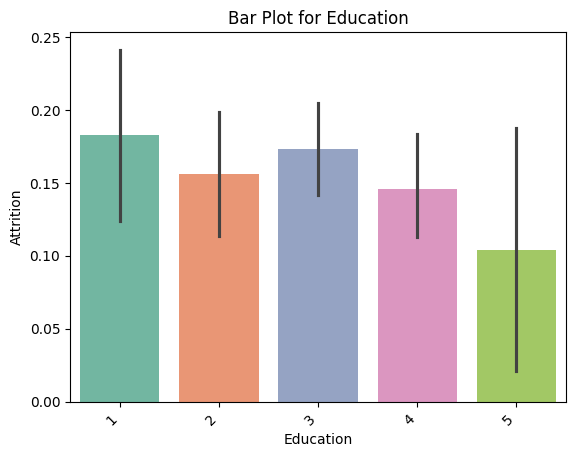

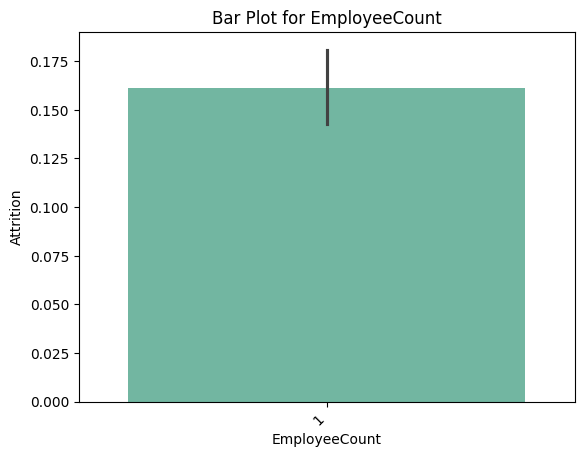

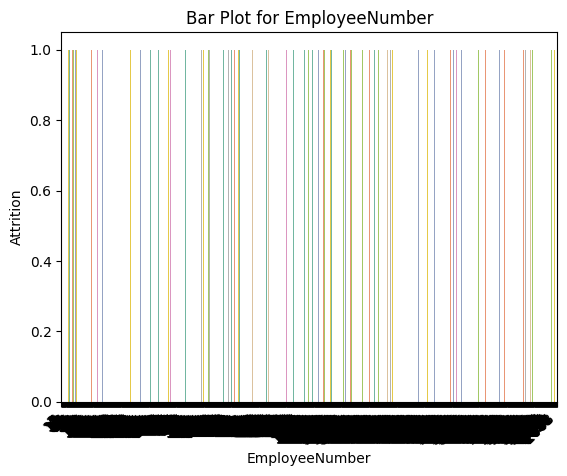

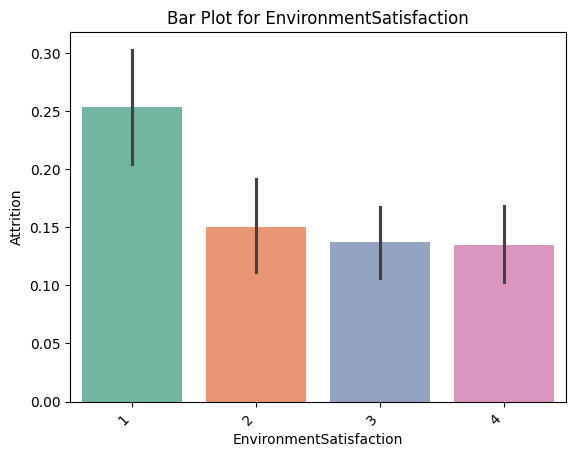

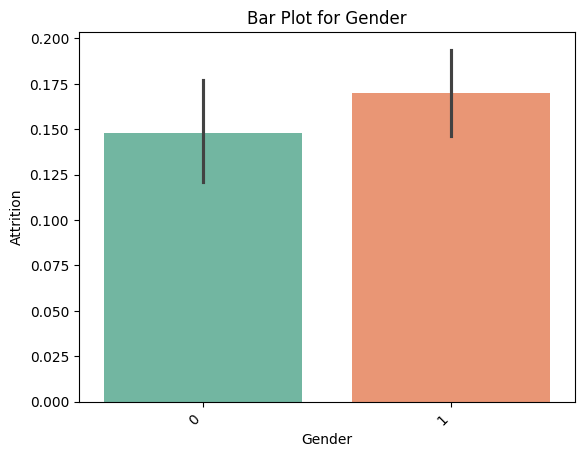

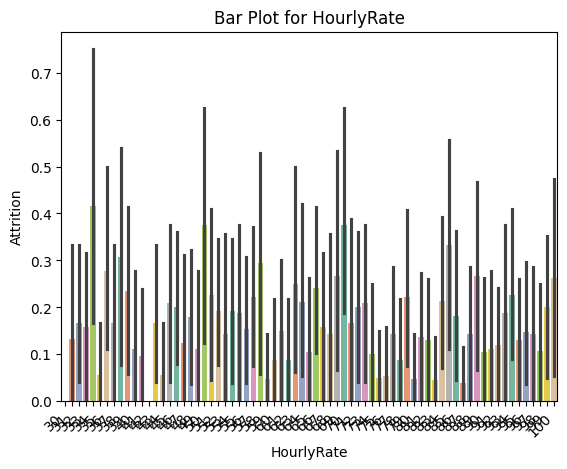

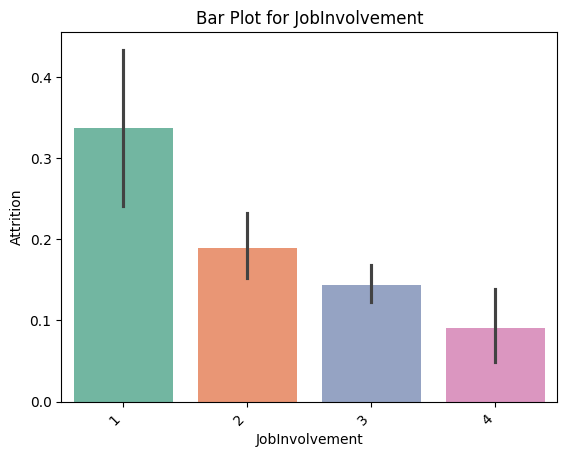

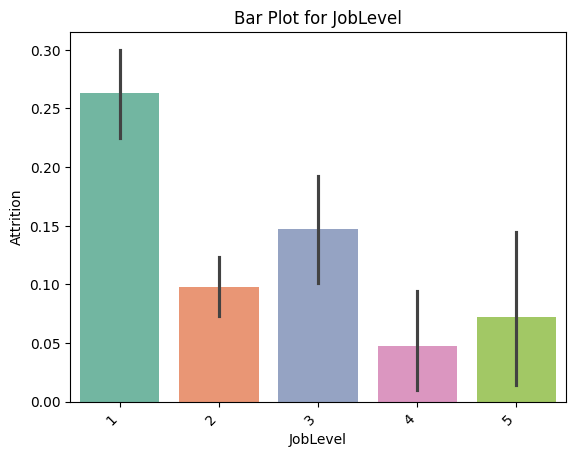

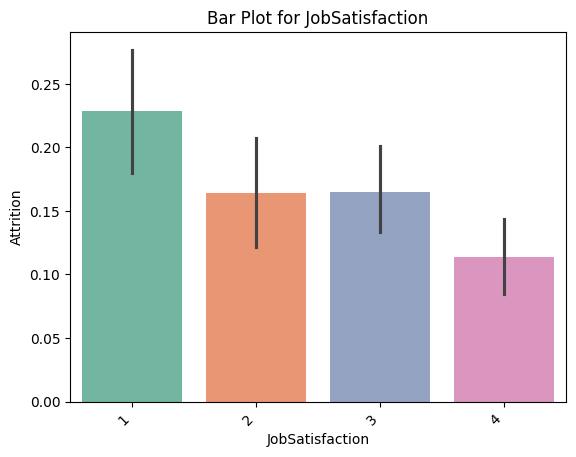

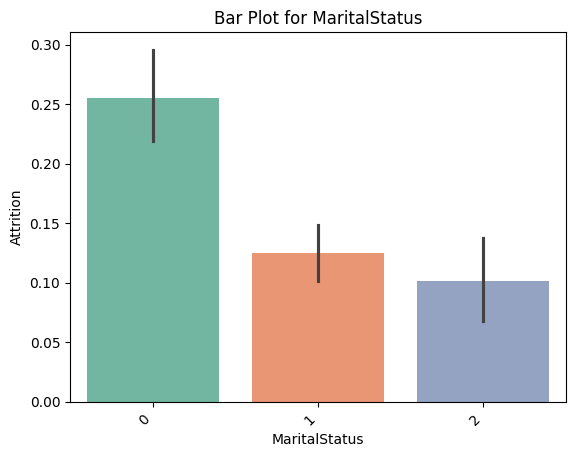

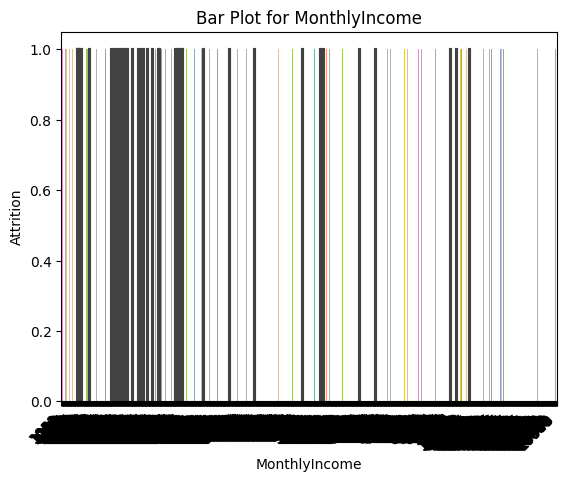

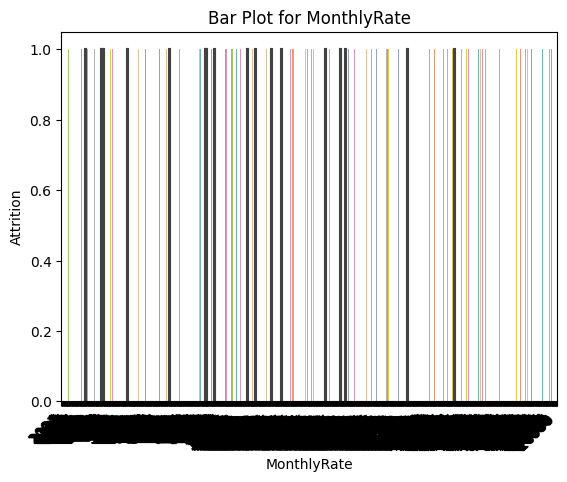

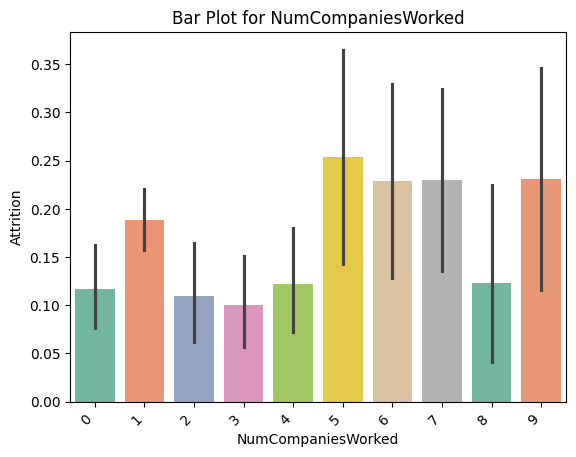

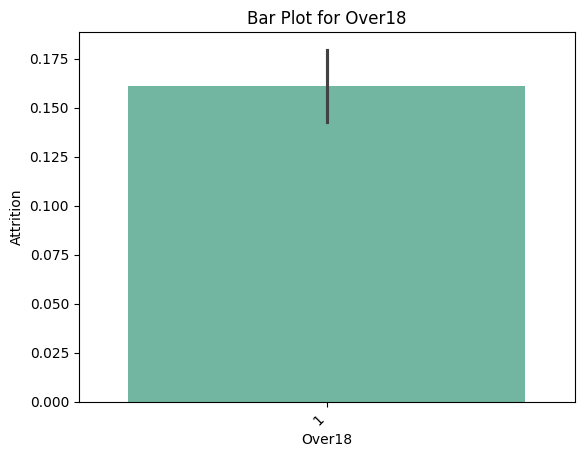

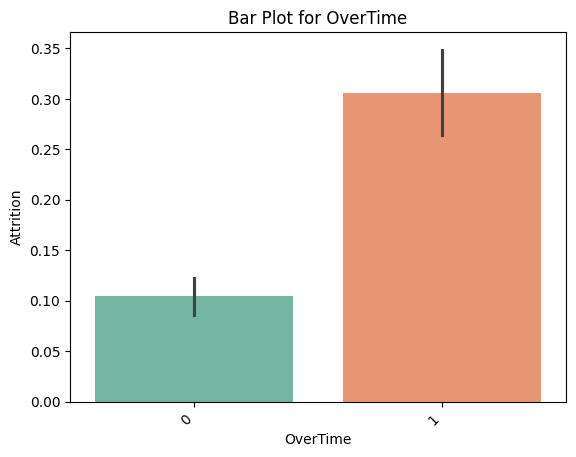

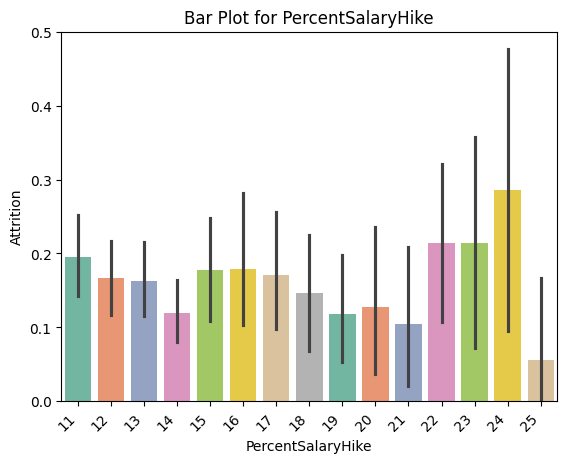

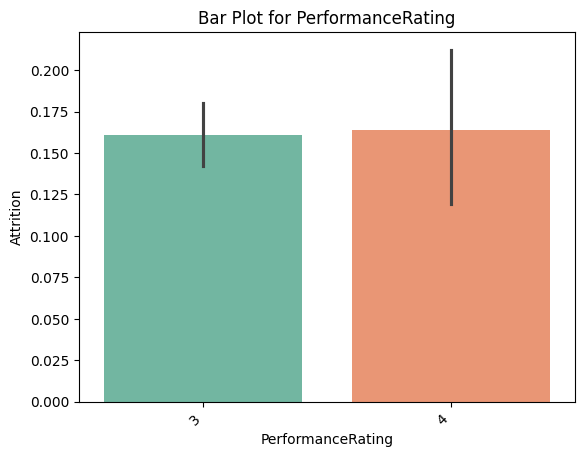

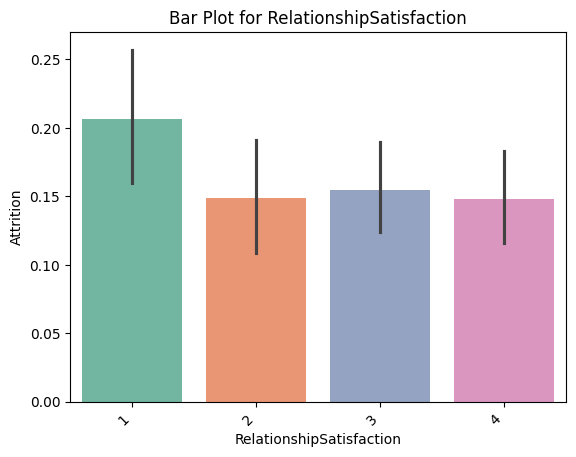

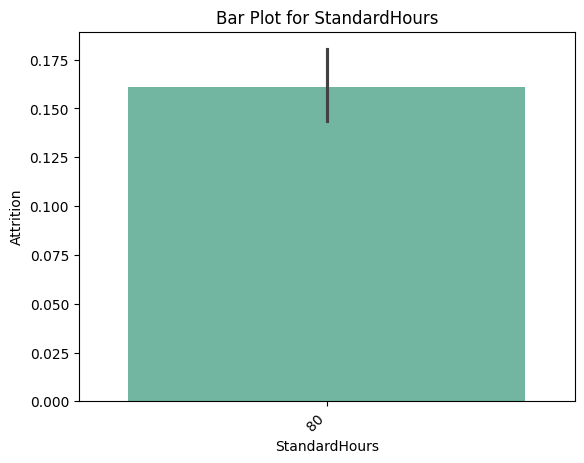

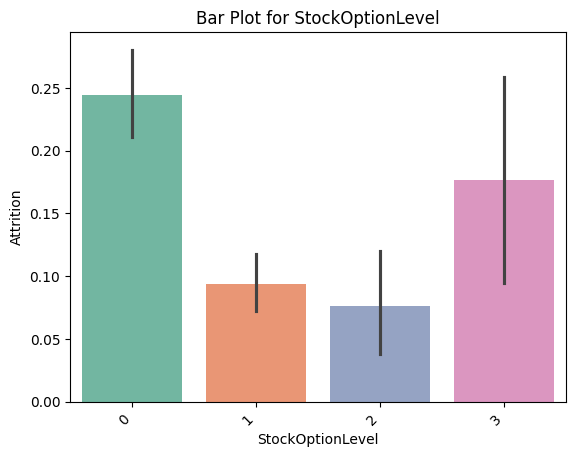

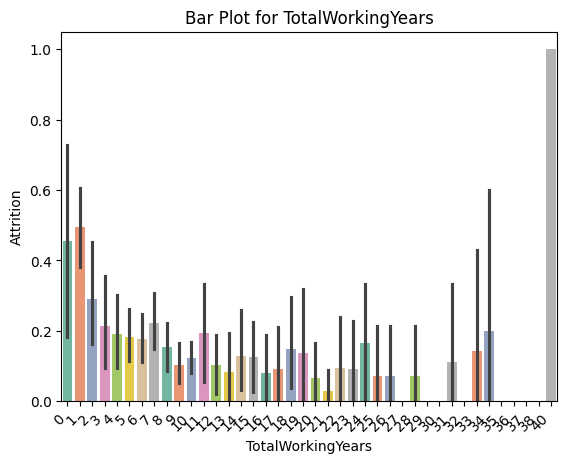

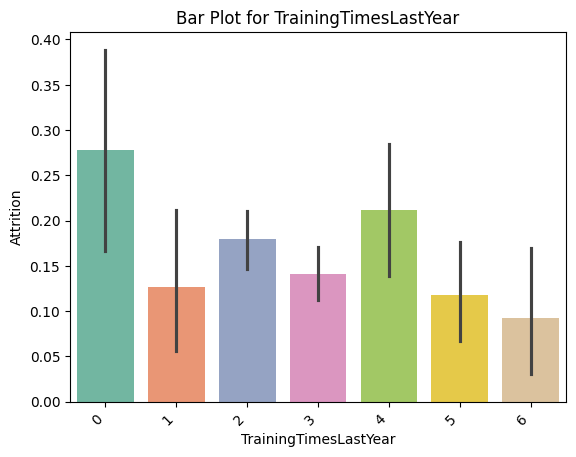

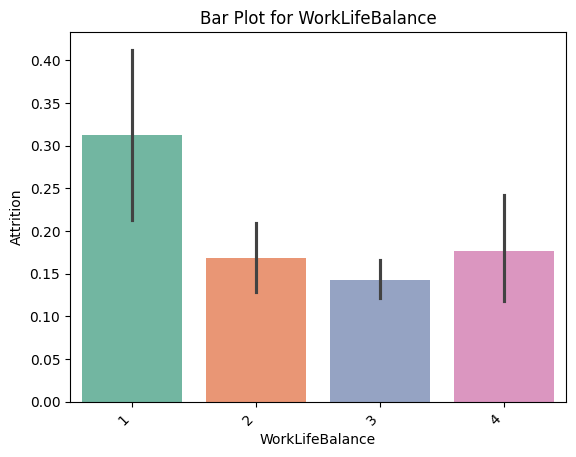

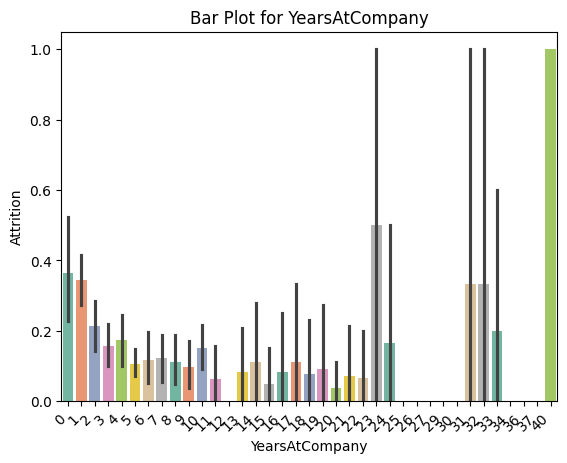

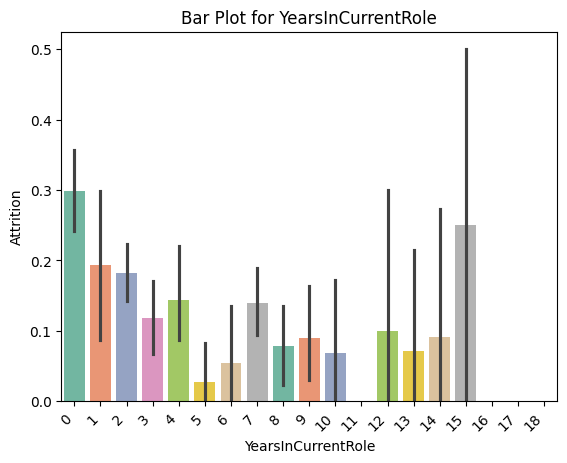

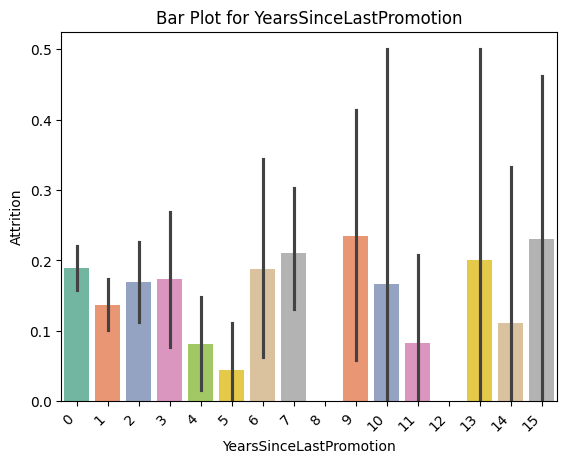

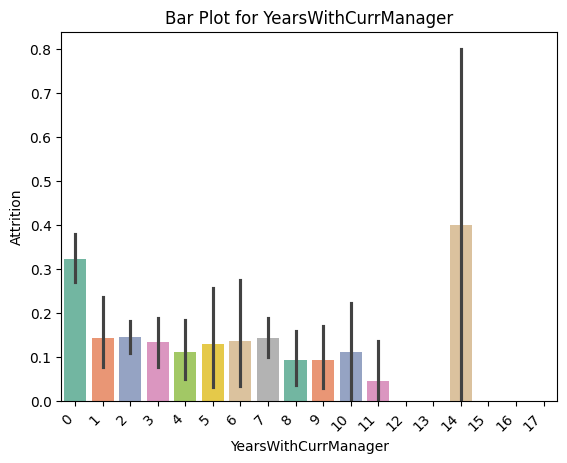

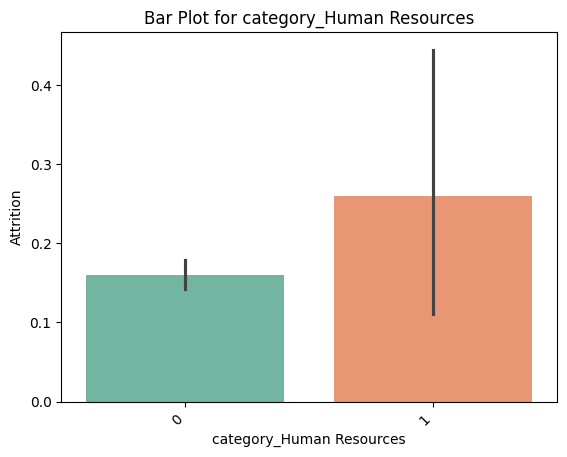

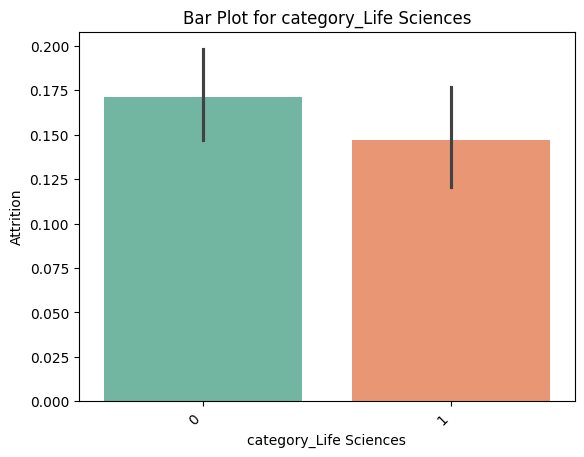

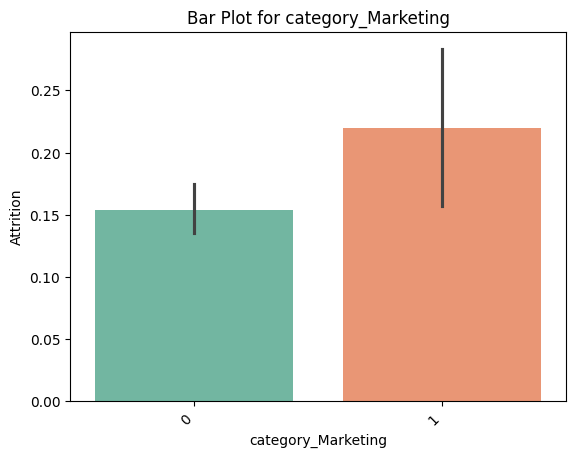

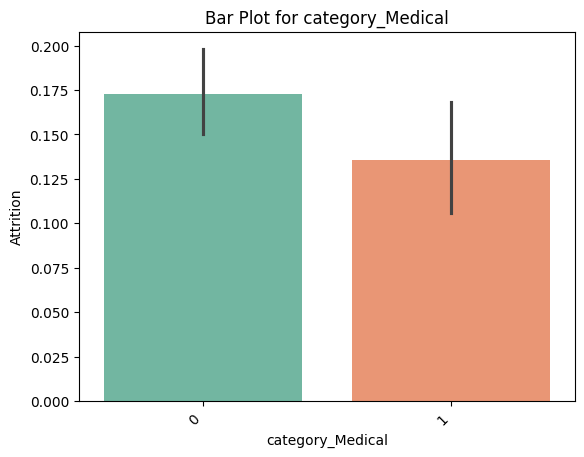

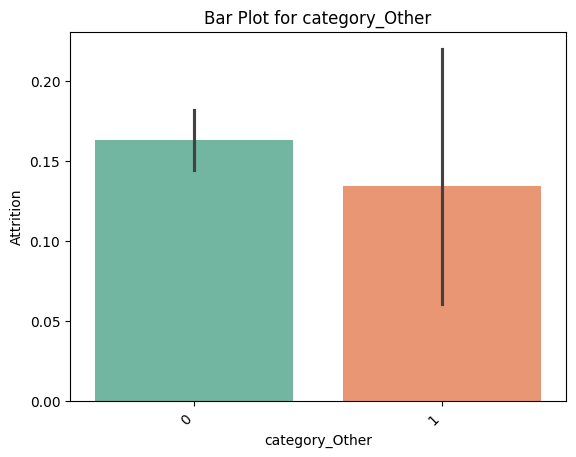

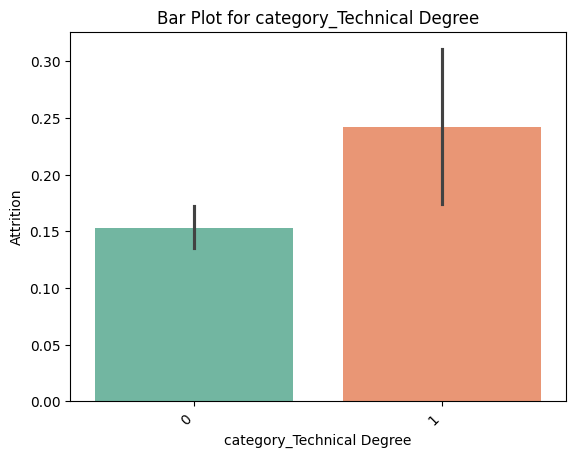

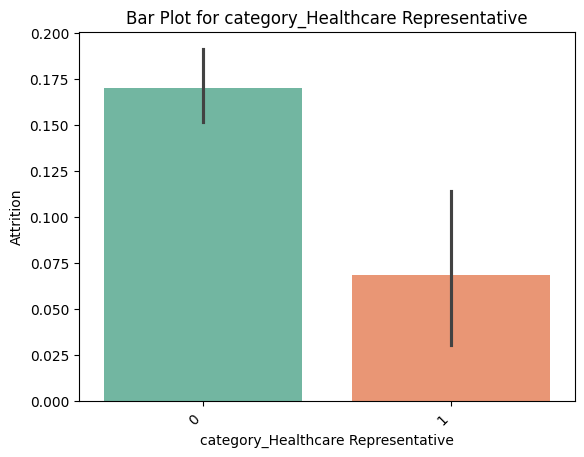

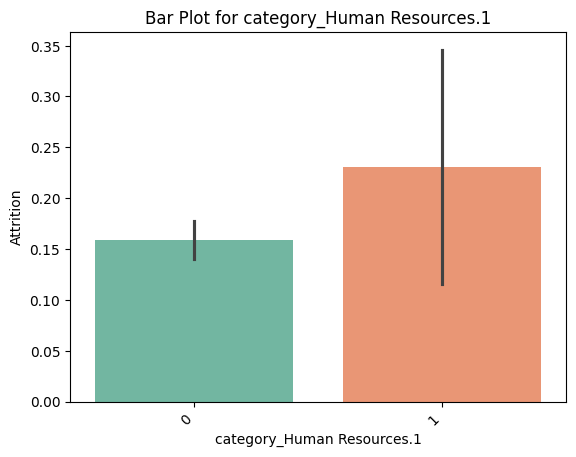

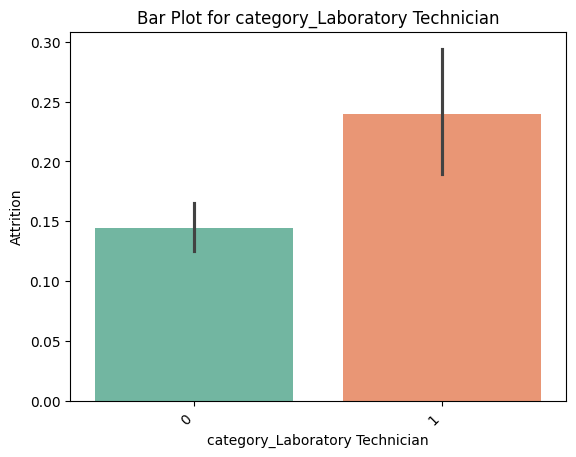

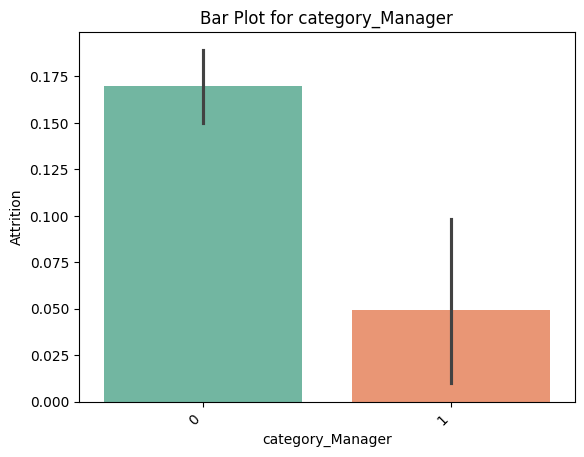

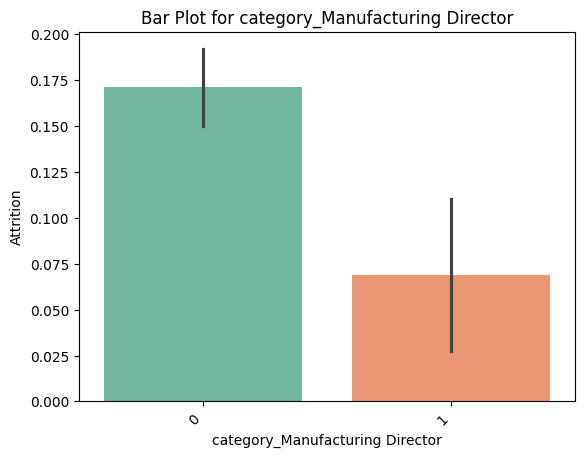

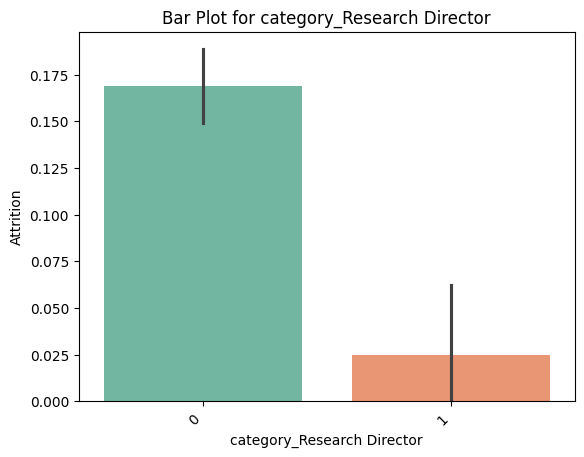

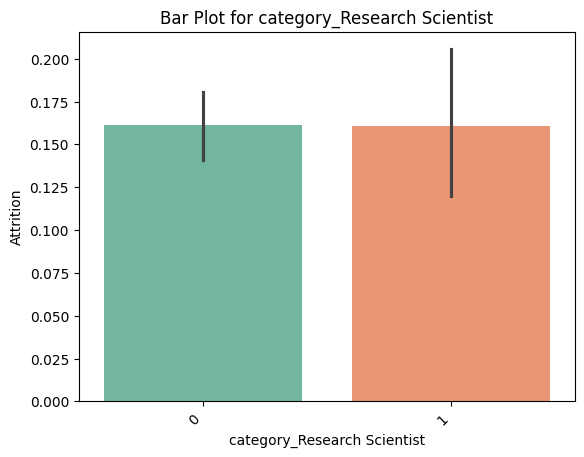

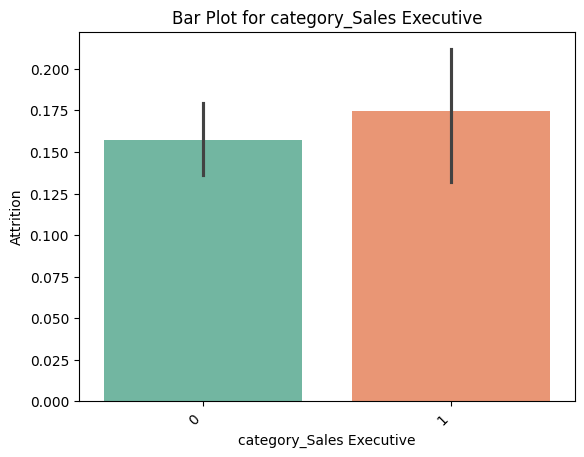

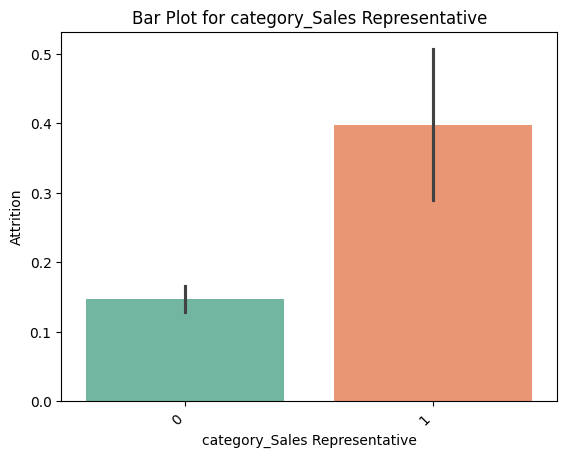

In [16]:
def graph_emp(df, y):
    for column in df.columns:
        sns.barplot(x=column, y=y, data=df, palette='Set2')
        plt.title(f'Bar Plot for {column}')
        plt.xlabel(column)
        plt.ylabel('Attrition')
        plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
        plt.show()

# Assuming 'df' is your DataFrame containing the data
# Assuming 'y' is the column you want to use for the y-axis
graph_emp(df, y)

***Train Test Split***

In [17]:
from sklearn.model_selection import train_test_split
X = df.drop('Attrition', axis=1)
y = df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [19]:
X_train.shape

(1176, 47)

In [20]:
X_test.shape

(294, 47)

In [21]:
y_train.shape

(1176,)

In [22]:
y_test.shape

(294,)

### **Model Fitting** *italicized text*

In [23]:
from sklearn.metrics import accuracy_score, classification_report

## **Logistic Regression**

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the hyperparameters grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2']  # Regularization type
}

# Initialize logistic regression classifier
lr = LogisticRegression(max_iter=1000)

# Initialize GridSearchCV with logistic regression classifier and hyperparameters grid
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best estimator to make predictions on the test data
best_lr = grid_search.best_estimator_
y_pred_lr = best_lr.predict(X_test)

Best Hyperparameters: {'C': 1, 'penalty': 'l2'}


In [26]:
score_lr = round(accuracy_score(y_test, y_pred_lr)*100, 2)
print(f'The accuracy score achieved using Logistic Regression is: {str(score_lr)} %')

report = classification_report(y_test, y_pred_lr)
print("Classification Report:")
print(report)

The accuracy score achieved using Logistic Regression is: 86.39 %
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       245
           1       0.67      0.37      0.47        49

    accuracy                           0.86       294
   macro avg       0.78      0.67      0.70       294
weighted avg       0.85      0.86      0.85       294



## **Decision Treet**

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report


max_accuracy = 0
best_x = None

for x in range(300):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train, y_train)
    y_pred_dt = dt.predict(X_test)
    current_accuracy = accuracy_score(y_pred_dt, y_test)
    if current_accuracy > max_accuracy:
        max_accuracy = current_accuracy
        best_x = x

# Hyperparameter Tuning and Cross-Validation: Decision Tree Classifier
param_grid = {'max_depth': [None, 10, 20, 30, 40, 50]}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=best_x), param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_dt = grid_search.best_estimator_
y_pred_best_dt = best_dt.predict(X_test)

In [29]:
score_dt = round(accuracy_score(y_test, y_pred_best_dt)*100, 2)
print(f'The accuracy score achieved using Decision Tree Classifier with hyperparameter tuning is: {str(score_dt)} %')

print("Classification Report:")
print(classification_report(y_test, y_pred_best_dt))

The accuracy score achieved using Decision Tree Classifier with hyperparameter tuning is: 79.93 %
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.89      0.88       245
           1       0.39      0.37      0.38        49

    accuracy                           0.80       294
   macro avg       0.63      0.63      0.63       294
weighted avg       0.79      0.80      0.80       294



### **Random Forest**

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier()

# Hyperparameter Tuning and Cross-Validation: Random Forest Classifier
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_


best_model = RandomForestClassifier(**best_params)
best_model.fit(X_train, y_train)
y_pred_rf = best_model.predict(X_test)

In [31]:
score_rf = round(accuracy_score(y_test, y_pred_rf)*100, 2)
print(f'The accuracy score achieved using Random Forest with hyperparameter tuning is: {str(score_rf)} %')

print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

The accuracy score achieved using Random Forest with hyperparameter tuning is: 85.03 %
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       245
           1       0.78      0.14      0.24        49

    accuracy                           0.85       294
   macro avg       0.82      0.57      0.58       294
weighted avg       0.84      0.85      0.80       294



# **Gradient Boosting (e.g., XGBoost or LightGBM)**

In [32]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV


xgb_model = xgb.XGBClassifier()

# Hyperparameter Tuning and Cross-Validation: XGBoost
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001]
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

best_model = xgb.XGBClassifier(**best_params)
best_model.fit(X_train, y_train)
y_pred_xgb = best_model.predict(X_test)

In [33]:
score_xgb = round(accuracy_score(y_test, y_pred_xgb)*100, 2)
print(f'The accuracy score achieved using XGBoost with hyperparameter tuning is: {str(score_xgb)} %')

print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))

The accuracy score achieved using XGBoost with hyperparameter tuning is: 85.03 %
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       245
           1       0.61      0.29      0.39        49

    accuracy                           0.85       294
   macro avg       0.74      0.62      0.65       294
weighted avg       0.83      0.85      0.83       294



In [34]:
import lightgbm as lgb

lgb_model = lgb.LGBMClassifier()

# Hyperparameter Tuning and Cross-Validation: LightGBM
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001]
}

grid_search = GridSearchCV(estimator=lgb_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_


best_model = lgb.LGBMClassifier(**best_params)
best_model.fit(X_train, y_train)
y_pred_lgb = best_model.predict(X_test)

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

### ***Naive Bayes***

In [39]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

nb = GaussianNB()

# Hyperparameter Tuning and Cross-Validation: Naive Bayes
param_grid = {
    'priors': [None, [0.1, 0.9], [0.2, 0.8], [0.5, 0.5]]
}

grid_search_nb = GridSearchCV(nb, param_grid, cv=5)
grid_search_nb.fit(X_train, y_train)

best_nb = grid_search_nb.best_estimator_
y_pred_nb = best_nb.predict(X_test)

In [40]:
score_nb = round(accuracy_score(y_test, y_pred_nb)*100, 2)
print(f'The accuracy score achieved using Naive Bayes with hyperparameter tuning is: {str(score_nb)} %')

print("Classification Report:")
print(classification_report(y_test, y_pred_nb))

The accuracy score achieved using Naive Bayes with hyperparameter tuning is: 65.31 %
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.65      0.76       245
           1       0.27      0.65      0.39        49

    accuracy                           0.65       294
   macro avg       0.59      0.65      0.57       294
weighted avg       0.80      0.65      0.70       294



### **K-Nearest Neighbors (KNN)**

In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Define the pipeline with feature scaling and KNN classifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

# Hyperparameter Tuning and Cross-Validation: KNN
param_grid = {
    'knn__n_neighbors': [3, 5, 7, 9],
    'knn__weights': ['uniform', 'distance'],
    'knn__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
}


grid_search_knn = GridSearchCV(pipeline, param_grid, cv=5)
grid_search_knn.fit(X_train, y_train)

best_knn = grid_search_knn.best_estimator_
y_pred_knn = best_knn.predict(X_test)

In [55]:
score_knn = round(accuracy_score(y_test, y_pred_knn)*100, 2)
print(f'The accuracy score achieved using K-Nearest Neightbors with hyperparameter tuning is: {str(score_knn)} %')

print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

The accuracy score achieved using K-Nearest Neightbors with hyperparameter tuning is: 84.01 %
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       245
           1       0.60      0.12      0.20        49

    accuracy                           0.84       294
   macro avg       0.72      0.55      0.56       294
weighted avg       0.81      0.84      0.79       294

